In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,100_ma,200_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,
2022-02-24,408.665466,409.104400,391.815078,392.177633,213942900,434.263551,422.551210,1.0,0.015049,0.015049
2022-02-25,417.682281,417.768152,408.245654,409.915429,121804500,434.364793,422.724688,1.0,0.037445,0.037445
2022-02-28,416.613678,418.111712,410.955533,412.224549,145615000,434.412942,422.869820,1.0,0.034791,0.034791
2022-03-01,410.268524,417.128917,407.530069,415.096557,137785900,434.380526,422.953468,1.0,0.019031,0.019031
2022-03-02,417.815918,419.562013,411.785637,412.548951,117726500,434.387832,423.079861,1.0,0.037777,0.037777
...,...,...,...,...,...,...,...,...,...,...
2025-04-28,550.849976,553.549988,545.020020,551.390015,47613800,578.301607,570.068744,1.0,0.368209,0.435400
2025-04-29,554.320007,555.450012,548.549988,548.909973,47775100,577.846799,570.084049,1.0,0.376828,0.444443
2025-04-30,554.539978,556.520020,541.520020,547.570007,93101500,577.391407,570.083068,1.0,0.377374,0.445016


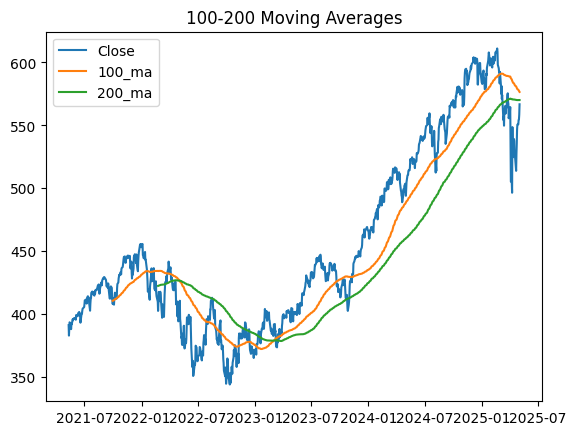

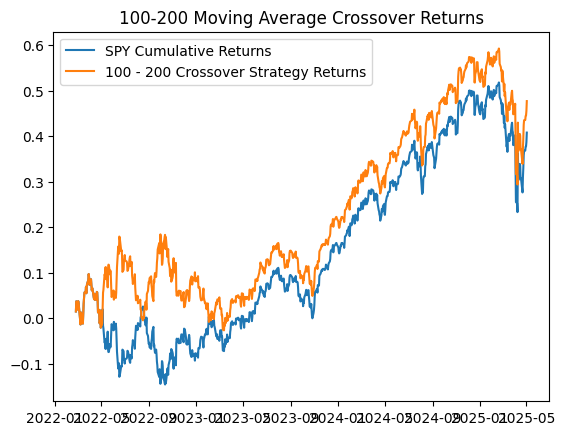

In [2]:
TICKER = 'SPY'
FAST = 100
SLOW = 200
LOOKBACK = 1000

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def add_moving_averages(df, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{SLOW}_ma'] = df['Close'].rolling(slow).mean()

    plt.plot(df['Close'])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])
    plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma'])
    plt.title(f'{FAST}-{SLOW} Moving Averages');
    return df.dropna()

def add_strategy(df, fast, slow):
    
    # long when fast > slow, short otherwise
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, ticker, fast, slow):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1

    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{ticker} Cumulative Returns', f'{fast} - {slow} Crossover Strategy Returns'])
    plt.title(f'{FAST}-{SLOW} Moving Average Crossover Returns'); 

    return df.dropna()

def main():
    df = get_data()
    df = add_moving_averages(df, FAST, SLOW)
    df = add_strategy(df, FAST, SLOW)
    df = test_strategy(df, TICKER, FAST, SLOW)

    return df

main()